In [209]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [210]:
house_path = "/kaggle/input/seattle-house-data/seattle_real_estate.csv"
house = pd.read_csv(house_path)
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Write a Python function that takes the original data and breaks it up into two random sets; the training set and the test set. A parameter of this function should be the percentage of data that you want to use for the training set. The function should return the training set and the test set.

In [211]:
def mean(data):
    sum = 0
    for val in data:
        sum += val
    average = sum/len(data)
    return average
  
def median(data):
    data.sort()
    if len(data) % 2 == 0:
        middle = [data[len(data)//2 - 1], data[len(data)//2]]
        mid_avg = mean(middle)
        return mid_avg
    else:
        middle = data[len(data)//2]
        return middle

def variance(data):
    sum = 0
    for num in data:
        sum += (num - mean(data))**2
    vari = sum/len(data)
    return vari

def stand_dev(data):
    de = math.sqrt(variance(data))
    return de

def elem_stats(data, rounder=False):
    if rounder== True:
        data_stats = {"mean": round(mean(data), 2), 'median': round(median(data), 2), 'variance': round(variance(data),2), 'standard_deviance': round(stand_dev(data),2), "min": round(min(data),2), 'max': round(max(data),2)}
    else:
        data_stats = {"mean": mean(data), 'median':median(data), 'variance':variance(data), 'standard_deviance': stand_dev(data), "min": min(data), 'max': max(data)}
    return data_stats

def sets(data, percent):
    """percent as an int"""
    training = data.sample(frac=percent/100)
    training.sort_index(inplace=True)
    
    ind = []
    
    for num in range(0, len(data)):
        if num in training.index:
            continue
        else:
            ind.append(num)
            
    tester = data.iloc[ind]
    
    return training, tester

def least_squares_array(array1, array2):
    x_sq = np.sum(np.power(array1, 2))
    x_sum = np.sum(array1)
    xy_sum = np.sum(np.multiply(array1, array2))
    y_sum = np.sum(array2)
    
    array_reg = np.array([[x_sq, x_sum], [x_sum, len(array1)]])
    array_2 = np.array([xy_sum, y_sum])
    array_inverse = np.linalg.inv(array_reg)
    answer = np.dot(array_inverse, array_2)
    return answer

def slope_to_points(slope, intercept, point_nums):
    list_x = []
    list_y = []
    for num in point_nums:
        list_x.append(num)
        y_point = slope * num + intercept
        list_y.append(y_point)
    return list_x, list_y

def line_graph(x_list, y_list, x_label = None, y_label = None, amount=1, colour='blue', mark="o", line='-'):
    '''amount is number of lines on a graph. if the amount is greater than one, submit lists of lists for the other three paramters. ex: amount=1, x_list=[1,2,3] or amount=2, x_list=[[1,2,3],[4,5,6]]'''
    if amount >1:
        for num in range(0, amount):
            plt.plot(x_list[num], y_list[num], color=colour[num], marker=mark[num], linestyle=line[num])
            
def correlation_array(array1, array2):
    x_sum = np.sum(array1)
    y_sum = np.sum(array2)
    e1 = np.sum(np.multiply(array1, array2))
    x_sq = np.sum(np.power(array1, 2))
    y_sq = np.sum(np.power(array2,2))
    
    e1 = e1*len(array1)

    x_sq_sub = (x_sq *len(array1)) - x_sum**2
    x_sqed = math.sqrt(x_sq_sub)
    
    y_sq_sub = (y_sq * len(array2)) - y_sum**2
    y_sqed = math.sqrt(y_sq_sub)
    
    top = e1 - (x_sum * y_sum)
    bottom = x_sqed*y_sqed
    
    corr = top / bottom
    
    return corr

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

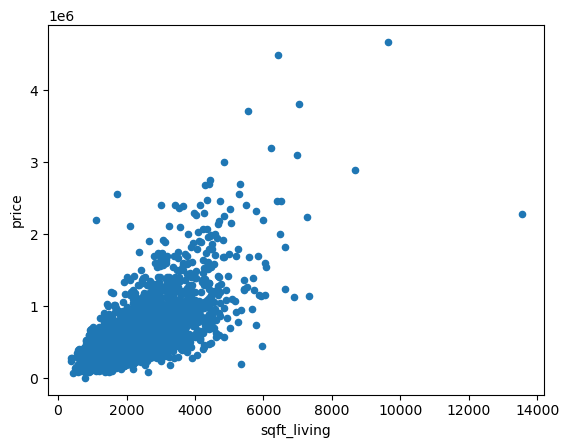

In [212]:
clean_house = house[(house['price'] > 0) & (house['price'] < 5000000) & (house['bedrooms'] > 0) & (house['bathrooms'] > 0) & (house['sqft_living'] > 0) & (house['sqft_lot'] > 0)] #wrap conditions in () to seperate them
clean_house.plot.scatter('sqft_living', 'price')

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

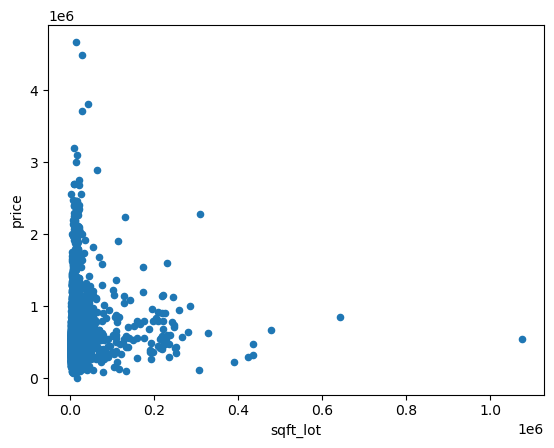

In [213]:
clean_house = house[(house['price'] > 0) & (house['price'] < 5000000)] #wrap conditions in () to seperate them
clean_house.plot.scatter('sqft_lot', 'price')

In [214]:
train, test = sets(clean_house, 50)
train

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,4.900000e+05,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
8,2014-05-02 00:00:00,4.525000e+05,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,2014-07-08 00:00:00,3.961667e+05,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,2.529800e+05,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA


In [215]:
test

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
6,2014-05-02 00:00:00,335000.000000,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.000000,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
13,2014-05-02 00:00:00,365000.000000,3.0,1.00,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Investigate the correlation between the size of the house (sqft_living) and cost and the lot size (sqft_lot). Use data from the training set to compute the correlation coefficient. Then compare your answer with the correlation coefficient with the correlation coefficient you get the test data. Does the original correlation coefficient agree with the new one ?  

In [216]:
train[['price', 'sqft_living', 'sqft_lot']].corr() #when doing multiple columns, need brackets

,price,sqft_living,sqft_lot
price,1.000000,0.709143,0.088557
sqft_living,0.709143,1.000000,0.225002
sqft_lot,0.088557,0.225002,1.000000


In [217]:
test[['price', 'sqft_living', 'sqft_lot']].corr()

,price,sqft_living,sqft_lot
price,1.000000,0.706914,0.076836
sqft_living,0.706914,1.000000,0.194390
sqft_lot,0.076836,0.194390,1.000000


In [218]:
clean_house[['price', 'sqft_living', 'sqft_lot']].corr()

,price,sqft_living,sqft_lot
price,1.000000,0.694739,0.082877
sqft_living,0.694739,1.000000,0.213736
sqft_lot,0.082877,0.213736,1.000000


Develop a linear regression model for cost for each of the two independent variables sqft_living and sqft_lot. Use data from the training set to compute the linear regression model.
           Plot the graphs for each model.
                Which one is a better predictor ?
                Compare the linear regression model you developed above and test it with the test data set from the 
                     file. How well does it predict the cost?

272.89898856164194 -35550.82630869907


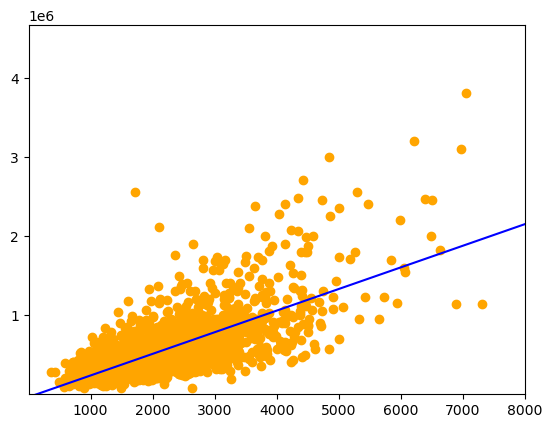

In [219]:
s_liv, i_liv = least_squares_array(train["sqft_living"], train["price"])
s_lot, i_lot = least_squares_array(train["sqft_lot"], train["price"])

liv_x, liv_y = slope_to_points(s_liv, i_liv, range(0,round(max(train['price']))))
lot_x, lot_y = slope_to_points(s_lot, i_lot, range(0,round(max(train['price']))))

line_graph([train["sqft_living"], liv_x], [train["price"], liv_y], x_label = "Sqft Living", y_label = "Price", amount=2, colour=["orange", "blue"], mark=["o", ''], line=["", "-"])
plt.xlim(1,8000)
plt.ylim(1, round(max(train['price'])))
print(s_liv, i_liv)

0.9213352526093275 534490.6582020115


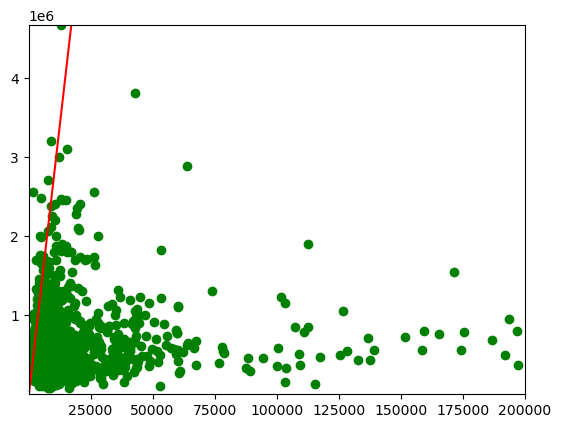

In [220]:
line_graph([train["sqft_lot"], liv_x], [train["price"], liv_y], x_label = "Sqft Lot", y_label = "Price", amount=2, colour=["green", "red"], mark=["o", ''], line=["", "-"])
plt.xlim(1,200000)
plt.ylim(1, round(max(train['price'])))
print(s_lot, i_lot)

* ****The linear model kinda works for the sqft_living and price, but not for the sqft_lot and price****

Prepare an analysis of the Seattle Area real estate market by zipcode, for each zipcode with 95 or more listings, to be given to the client. Start your analysis by compiling basic statistics for price, # of bedrooms, # of bathrooms, sqft_living, sqft_lot, and year built. Also, include the number of listing for each zipcode. You can use any other of the analytical techniques that have been presented in the class as well whatever plots you feel will help explain the differences between the various neighborhoods, i.e. zipcodes. Put the results of your study into a presentation that can be shown to the client.

In [221]:
clean_house.sort_values("statezip", inplace=True)
clean_house.reset_index(inplace=True)

zip_house = clean_house
zips = []
amount = []
ind = []
count = 0

for zipcode in clean_house.statezip.unique():
    hl = clean_house["statezip"].to_list()
    if hl.count(zipcode) >= 95:
        count+= hl.count(zipcode)
        ind.append(count)
        amount.append(hl.count(zipcode))
        zips.append(zipcode)
    else:
        zip_house = zip_house[zip_house.statezip != zipcode]
        
zip_house.reset_index(inplace=True)
print(zips, amount, ind)
zip_house
#there's a warning, i looked it up and it said it was because i was modifiying a copied dataframe

['WA 98006', 'WA 98027', 'WA 98034', 'WA 98038', 'WA 98042', 'WA 98052', 'WA 98053', 'WA 98058', 'WA 98059', 'WA 98103', 'WA 98115', 'WA 98117'] [109, 95, 99, 95, 98, 135, 98, 95, 106, 148, 129, 132] [109, 204, 303, 398, 496, 631, 729, 824, 930, 1078, 1207, 1339]


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,level_0,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,248,2978,2014-06-20 00:00:00,2110000.0,3.0,2.25,3230,17833,2.0,0,0,4,3230,0,1973,0,12 Columbia Key,Bellevue,WA 98006,USA
1,249,2973,2014-06-20 00:00:00,995000.0,4.0,4.50,3850,13551,2.0,0,2,3,3000,850,1998,2006,5659 178th Ave SE,Bellevue,WA 98006,USA
2,250,1873,2014-06-04 00:00:00,1100000.0,5.0,2.75,2660,8737,1.0,0,4,5,1470,1190,1969,0,4435 140th Ave SE,Bellevue,WA 98006,USA
3,251,3534,2014-06-27 00:00:00,1619999.0,4.0,3.00,3900,9750,1.0,0,4,5,2520,1380,1972,0,4720 Somerset Ave SE,Bellevue,WA 98006,USA
4,252,1880,2014-06-04 00:00:00,646000.0,4.0,2.25,2500,8500,1.0,0,0,4,1600,900,1978,2000,4615 158th Ave SE,Bellevue,WA 98006,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,3428,869,2014-05-19 00:00:00,560000.0,4.0,1.00,1660,4690,1.5,0,0,3,1260,400,1945,2010,7353 16th Ave NW,Seattle,WA 98117,USA
1335,3429,2820,2014-06-19 00:00:00,576000.0,3.0,2.50,1940,9000,1.0,0,0,4,970,970,1948,0,8817 28th Ave NW,Seattle,WA 98117,USA
1336,3430,438,2014-05-09 00:00:00,481450.0,3.0,2.00,1410,4800,1.0,0,0,3,1410,0,1940,1996,7701 16th Ave NW,Seattle,WA 98117,USA
1337,3431,1203,2014-05-22 00:00:00,320000.0,3.0,2.25,998,844,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA


In [222]:
def zip_df_stats(data):
    cs = ["mean", 'median', 'variance', 'standard_deviance', "min", 'max']
    rs = ["price", 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
    d = [list((elem_stats(data["price"].to_list())).values()),list((elem_stats(data['bedrooms'].to_list())).values()),list((elem_stats(data['bathrooms'].to_list())).values()),list((elem_stats(data['sqft_living'].to_list())).values()),list((elem_stats(data['sqft_lot'].to_list())).values()),list((elem_stats(data['yr_built'].to_list())).values())]
    
    df = pd.DataFrame(d, index = rs, columns = cs)
    return df

In [223]:
z1 = zip_house[0:ind[0]]
z2 = zip_house[ind[0]:ind[1]]
z3 = zip_house[ind[1]:ind[2]]
z4 = zip_house[ind[2]:ind[3]]
z5 = zip_house[ind[3]:ind[4]]
z6 = zip_house[ind[4]: ind[5]]
z7 = zip_house[ind[5]: ind[6]]
z8 = zip_house[ind[6]: ind[7]]
z9 = zip_house[ind[7]: ind[8]]
z10 = zip_house[ind[8]: ind[9]]
z11 = zip_house[ind[9]: ind[10]]
z12 = zip_house[ind[10]: ind[11]]

z1d = zip_df_stats(z1)
z2d = zip_df_stats(z2)
z3d = zip_df_stats(z3)
z4d = zip_df_stats(z4)
z5d = zip_df_stats(z5)
z6d = zip_df_stats(z6)
z7d = zip_df_stats(z7)
z8d = zip_df_stats(z8)
z9d = zip_df_stats(z9)
z10d = zip_df_stats(z10)
z11d = zip_df_stats(z11)
z12d = zip_df_stats(z12)

z1d

,mean,median,variance,standard_deviance,min,max
price,800328.346330,746000.0,1.072293e+11,327458.795359,248000.0,2110000.0
bedrooms,3.880734,4.0,6.555004e-01,0.809630,2.0,7.0
bathrooms,2.529817,2.5,5.983082e-01,0.773504,1.0,5.5
sqft_living,2836.238532,2750.0,1.112645e+06,1054.820119,930.0,6630.0
sqft_lot,13331.165138,10224.0,6.334311e+07,7958.838314,4797.0,48743.0
yr_built,1978.146789,1977.0,3.325289e+02,18.235375,1911.0,2014.0


In [224]:
z2d

,mean,median,variance,standard_deviance,min,max
price,581749.989474,555000.0,5.694012e+10,238621.297946,195000.0,2200000.00
bedrooms,3.631579,3.0,8.221607e-01,0.906731,2.0,7.00
bathrooms,2.563158,2.5,5.960111e-01,0.772018,1.0,4.75
sqft_living,2576.947368,2420.0,1.012591e+06,1006.275910,1040.0,5990.00
sqft_lot,38899.915789,11875.0,1.261284e+10,112306.902600,1011.0,1074218.00
yr_built,1986.463158,1986.0,3.320592e+02,18.222491,1910.0,2014.00


In [225]:
z3d

,mean,median,variance,standard_deviance,min,max
price,501118.971584,449500.00,8.496171e+10,291481.912560,90000.0,3000000.00
bedrooms,3.484848,3.00,5.123967e-01,0.715819,2.0,5.00
bathrooms,2.161616,2.25,3.804459e-01,0.616803,1.0,4.25
sqft_living,1943.717172,1820.00,5.074377e+05,712.346642,790.0,4850.00
sqft_lot,8781.525253,8000.00,1.642083e+07,4052.262479,1360.0,38141.00
yr_built,1976.898990,1974.00,1.916464e+02,13.843640,1921.0,2009.00


In [226]:
z4d

,mean,median,variance,standard_deviance,min,max
price,340016.752982,321000.0,1.008787e+10,100438.370988,108333.333333,725000.0
bedrooms,3.473684,3.0,3.966759e-01,0.629822,2.000000,5.0
bathrooms,2.344737,2.5,1.765512e-01,0.420180,1.000000,3.5
sqft_living,2086.000000,1950.0,3.479840e+05,589.901687,830.000000,3640.0
sqft_lot,13825.431579,6908.0,7.559879e+08,27495.234350,2699.000000,219527.0
yr_built,1996.431579,2002.0,1.884980e+02,13.729456,1926.000000,2014.0


In [227]:
z5d

,mean,median,variance,standard_deviance,min,max
price,326779.559767,290500.00,4.721869e+10,217298.610133,83300.0,2199900.0
bedrooms,3.357143,3.00,4.540816e-01,0.673856,1.0,5.0
bathrooms,2.137755,2.25,3.113807e-01,0.558015,1.0,3.5
sqft_living,2009.744898,1915.00,4.548798e+05,674.447761,650.0,3800.0
sqft_lot,18284.418367,9600.00,4.103788e+08,20257.807690,3814.0,108366.0
yr_built,1984.765306,1984.00,2.038531e+02,14.277713,1945.0,2012.0


In [228]:
z6d

,mean,median,variance,standard_deviance,min,max
price,637555.719367,605000.0,3.511279e+10,187384.066952,259950.0,1700000.0
bedrooms,3.577778,4.0,5.254321e-01,0.724867,2.0,6.0
bathrooms,2.298148,2.5,2.717558e-01,0.521302,1.0,4.0
sqft_living,2275.592593,2180.0,4.928229e+05,702.013446,790.0,4410.0
sqft_lot,11302.111111,9180.0,7.337385e+07,8565.853655,1369.0,50662.0
yr_built,1983.814815,1982.0,2.384027e+02,15.440296,1933.0,2014.0


In [229]:
z7d

,mean,median,variance,standard_deviance,min,max
price,708179.781214,678549.782608,7.865209e+10,280449.804772,170000.0,2280000.0
bedrooms,3.193878,3.000000,9.726156e-01,0.986213,0.0,7.0
bathrooms,2.489796,2.500000,7.473449e-01,0.864491,0.0,8.0
sqft_living,2779.704082,2495.000000,2.164140e+06,1471.101463,1200.0,13540.0
sqft_lot,41687.816327,21953.500000,3.608115e+09,60067.589951,2828.0,307752.0
yr_built,1997.163265,2001.000000,1.222591e+02,11.057082,1940.0,2014.0


In [230]:
z8d

,mean,median,variance,standard_deviance,min,max
price,347928.795848,327500.00,1.604806e+10,126680.941747,137124.0,1135250.0
bedrooms,3.578947,4.00,6.016620e-01,0.775669,2.0,6.0
bathrooms,2.107895,2.25,3.982271e-01,0.631052,1.0,4.0
sqft_living,2113.168421,2050.00,8.344283e+05,913.470463,720.0,7320.0
sqft_lot,16670.210526,8366.00,1.064678e+09,32629.407809,3784.0,217800.0
yr_built,1977.568421,1977.00,2.732348e+02,16.529815,1925.0,2009.0


In [231]:
z9d

,mean,median,variance,standard_deviance,min,max
price,499455.770108,451750.0,4.329807e+10,208081.892226,232333.333333,1200000.00
bedrooms,3.650943,4.0,4.347633e-01,0.659366,1.000000,5.00
bathrooms,2.372642,2.5,3.965157e-01,0.629695,1.000000,3.75
sqft_living,2475.943396,2430.0,6.888241e+05,829.954282,750.000000,4720.00
sqft_lot,15891.971698,9460.0,8.892499e+08,29820.294099,3143.000000,217800.00
yr_built,1991.396226,1998.0,3.574656e+02,18.906762,1931.000000,2014.00


In [232]:
z10d

,mean,median,variance,standard_deviance,min,max
price,578663.061776,532000.0,4.095971e+10,202385.064646,310000.0,1555000.0
bedrooms,3.141892,3.0,1.216353e+00,1.102884,1.0,9.0
bathrooms,2.084459,2.0,6.516504e-01,0.807249,1.0,4.5
sqft_living,1717.804054,1540.0,4.115102e+05,641.490617,700.0,4360.0
sqft_lot,3280.966216,3203.5,3.328053e+06,1824.295175,681.0,9420.0
yr_built,1956.655405,1942.5,1.795010e+03,42.367554,1900.0,2014.0


In [233]:
z11d

,mean,median,variance,standard_deviance,min,max
price,599699.541528,545000.0,4.693799e+10,216651.768145,270000.0,1636000.00
bedrooms,3.170543,3.0,6.375819e-01,0.798487,1.0,5.00
bathrooms,1.897287,2.0,4.705547e-01,0.685970,1.0,4.25
sqft_living,1848.488372,1720.0,4.485600e+05,669.746187,700.0,3650.00
sqft_lot,5204.178295,5100.0,3.833414e+06,1957.910504,867.0,10900.00
yr_built,1947.418605,1942.0,7.614837e+02,27.594994,1902.0,2009.00


In [234]:
z12d

,mean,median,variance,standard_deviance,min,max
price,563904.759637,532550.00,3.811467e+10,195229.798284,167500.00,1370000.0
bedrooms,3.030303,3.00,7.869605e-01,0.887108,1.00,5.0
bathrooms,1.818182,1.75,4.830406e-01,0.695011,0.75,3.5
sqft_living,1711.257576,1610.00,4.385241e+05,662.211511,370.00,3760.0
sqft_lot,4573.280303,4566.00,5.121429e+06,2263.057352,844.00,16940.0
yr_built,1950.878788,1943.00,9.873792e+02,31.422591,1901.00,2014.0


0.5429692392552098


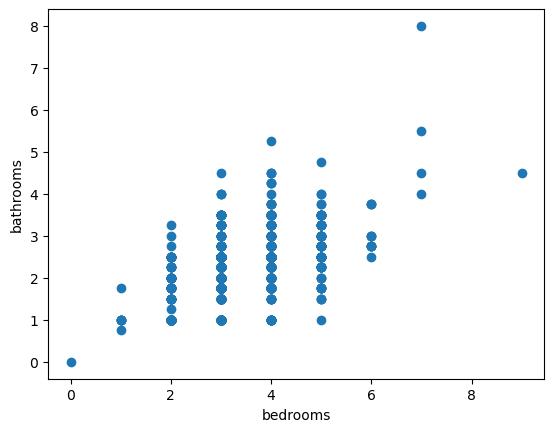

In [235]:
plt.scatter(zip_house["bedrooms"], zip_house['bathrooms'])
plt.xlabel("bedrooms")
plt.ylabel('bathrooms')
bedbath = correlation_array(zip_house["bedrooms"], zip_house['bathrooms'])
print(bedbath) #.545 correlation

0.3072992557093839


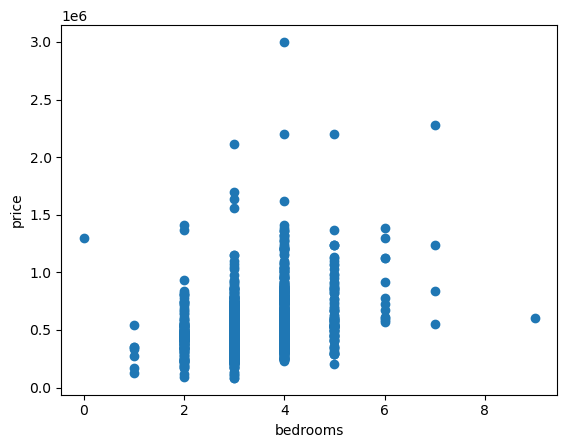

In [236]:
plt.scatter(zip_house["bedrooms"], zip_house['price'])
plt.xlabel("bedrooms")
plt.ylabel('price')
bedprice = correlation_array(zip_house["bedrooms"], zip_house['price'])
print(bedprice) #.341, bell curve

0.49418804666041294


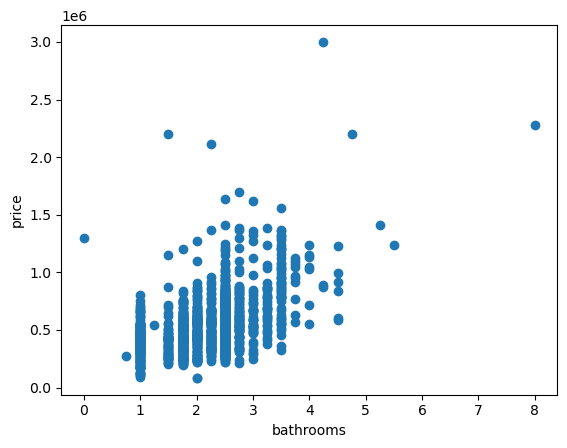

In [237]:
plt.scatter(zip_house["bathrooms"], zip_house['price'])
plt.xlabel("bathrooms")
plt.ylabel('price')
bathprice = correlation_array(zip_house["bathrooms"], zip_house['price'])
print(bathprice) #.533, clump

0.01768505690571266


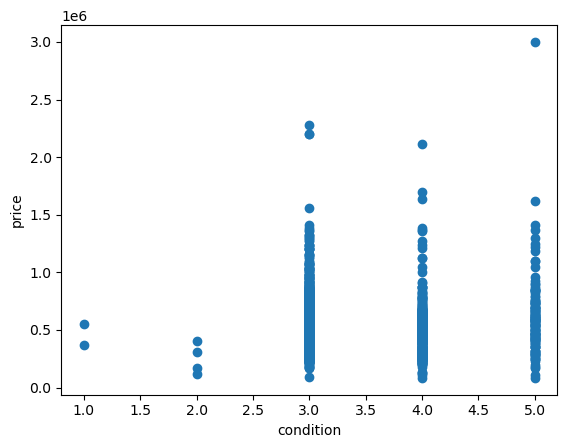

In [238]:
plt.scatter(zip_house["condition"], zip_house['price'])
plt.xlabel("condition")
plt.ylabel('price')
conprice = correlation_array(zip_house["condition"], zip_house['price'])
print(conprice) #.0569, no relation (other than low conditions being worth less)

The previous customer, the real estate firm who requested analysis of the Seattle
real estate market, was so pleased with the analysis provided by Girsch and Rosenthal Data
Analytics that the company has offered a new contract to the firm. The customer would like
the our company to create an app for it’s real estate agents. As an employee of the firm you
been tasked to write the code for the app. The app will provide the following functionality :
1). The app will take input from the real estate agents client in the form of responses to
the following questions regarding the house that they are looking for :

* The zipcode for the area that is to searched.
* The number of bedrooms.
* The number of bathrooms.
* The number of floors.
* Number of square feet of living space.
* The price.

2). The app will search through all listings in the user supplied zipcode and find the 5
listings that are closest to the user’s requested parameters and print out the location of the
property as well as all the values of the parameters b-f for the property from part 1.

* (x - x.mean())/x.std()
* ( (x1 – x2)^2 + (y1 – y2)^2)^1/2

In [239]:
def search_house():
    zipcode = input("Enter state and zipcode (ex. ME 04101): ")
    listings = zip_house[(zip_house['statezip'] == zipcode)]
    
    listings['price'] = (listings.price - listings.price.mean())/listings.price.std()
    listings['sqft_living'] = (listings.sqft_living -listings.sqft_living.mean())/listings.sqft_living.std()
    
    beds = int(input("Enter number of bedrooms: "))
    baths = int(input("Enter number of bathrooms: "))
    floors = int(input("Enter number of floors: "))
    live = int(input("Enter the square footage of living space: "))
    price = int(input("Enter the price"))
    
    live_norm = (live - listings.sqft_living.mean())/listings.sqft_living.std()
    price_norm = (price - listings.price.mean())/listings.price.std()
    
    distances = {}
    for i in range(listings.first_valid_index(), listings.last_valid_index()):
        distances[( ((beds - listings["bedrooms"][i])**2 + (baths - listings["bathrooms"][i])**2 + (floors - listings["floors"][i])**2 + (live - listings["sqft_living"][i])**2 + (price - listings["price"][i])**2)**(1/2) )] = i
        
    indes = []
    for n in range(0, 5):
        indes.append(distances[min(distances)])
        del distances[min(distances)]
    
    print(f"Zipcode: {zipcode}\nBeds: {beds}\nBaths: {baths}\nFloors: {floors}\nSqft Living: {live}\nPrice: {price}\n")
    for z in indes:
        print(zip_house.loc[z])
    
search_house()

Enter state and zipcode (ex. ME 04101):  WA 98042


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Enter number of bedrooms:  3
Enter number of bathrooms:  2
Enter number of floors:  1
Enter the square footage of living space:  1000
Enter the price 100000


Zipcode: WA 98042
Beds: 3
Baths: 2
Floors: 1
Sqft Living: 1000
Price: 100000

level_0                             1522
index                               4348
date                 2014-05-05 00:00:00
price                          2199900.0
bedrooms                             4.0
bathrooms                            1.5
sqft_living                         1120
sqft_lot                            5427
floors                               1.0
waterfront                             0
view                                   0
condition                              3
sqft_above                          1120
sqft_basement                          0
yr_built                            1969
yr_renovated                        2014
street           19009-19021 SE 266th St
city                           Covington
statezip                        WA 98042
country                              USA
Name: 490, dtype: object
level_0                         1453
index                            262
dat